In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Terrain Following Mesh

Use a topographic surface to create a 3D terrain-following mesh.

Terrain following meshes are common in the environmental sciences, for instance
in hydrological modelling (see
`Maxwell 2013 <https://www.sciencedirect.com/science/article/abs/pii/S0309170812002564>`_
and
`ParFlow <https://parflow.org>`_).

In this example, we domonstrate a simple way to make a 3D grid/mesh that
follows a given topographic surface. In this example, it is important to note
that the given digital elevation model (DEM) is structured (gridded and not
triangulated): this is common for DEMs.


In [2]:
# sphinx_gallery_thumbnail_number = 3
import pyvista as pv
import numpy as np
from pyvista import examples

Download a gridded topography surface (DEM)



In [3]:
dem = examples.download_crater_topo()
dem

UniformGrid (0x7f33f0b5e220)
  N Cells:	1677401
  N Points:	1680000
  X Bounds:	1.810e+06, 1.831e+06
  Y Bounds:	5.640e+06, 5.658e+06
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	1400, 1200, 1
  Spacing:	1.500e+01, 1.500e+01, 0.000e+00
  N Arrays:	1

Now let's subsample and extract an area of interest to make this example
simple (also the DEM we just load is pretty big).
Since the DEM we loaded is a :class:`pyvista.UniformGrid` mesh, we can use
the :func:`pyvista.UniformGridFilters.extract_subset` filter:



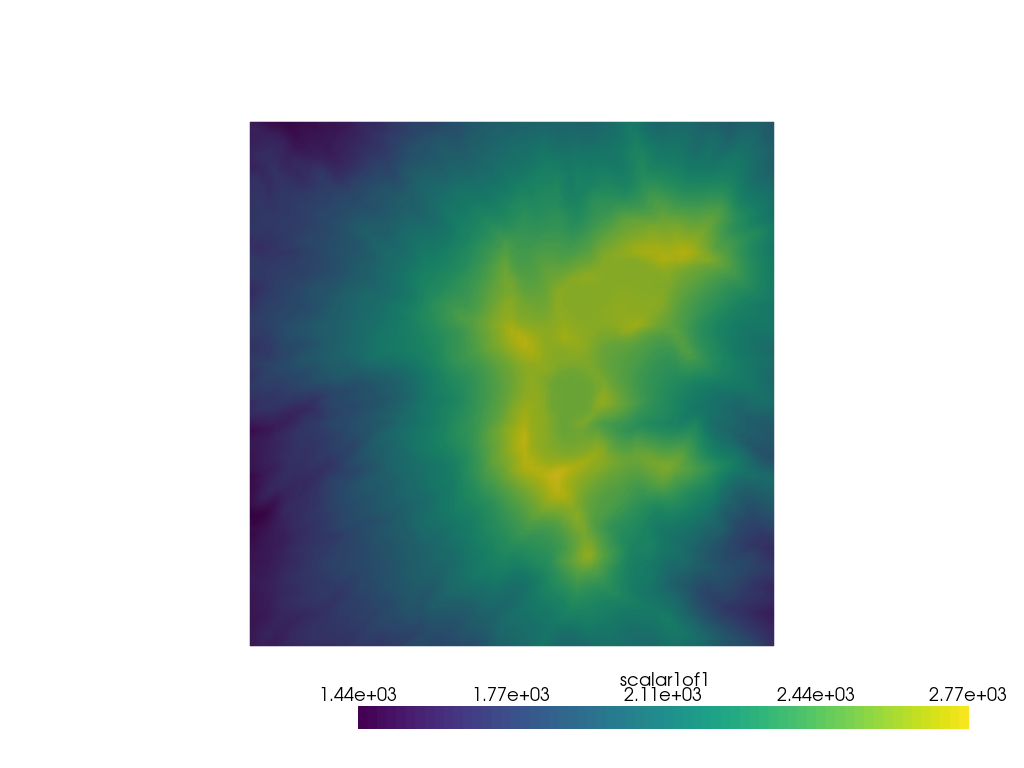

In [4]:
subset = dem.extract_subset((500, 900, 400, 800, 0, 0), (5,5,1))
subset.plot(cpos="xy")

Now that we have a region of interest for our terrain following mesh, lets
make a 3D surface of that DEM:



In [14]:
terrain = subset.warp_by_scalar()
terrain

StructuredGrid (0x7f33efe9e280)
  N Cells:	6400
  N Points:	6561
  X Bounds:	1.818e+06, 1.824e+06
  Y Bounds:	5.646e+06, 5.652e+06
  Z Bounds:	1.441e+03, 2.769e+03
  Dimensions:	81, 81, 1
  N Arrays:	1

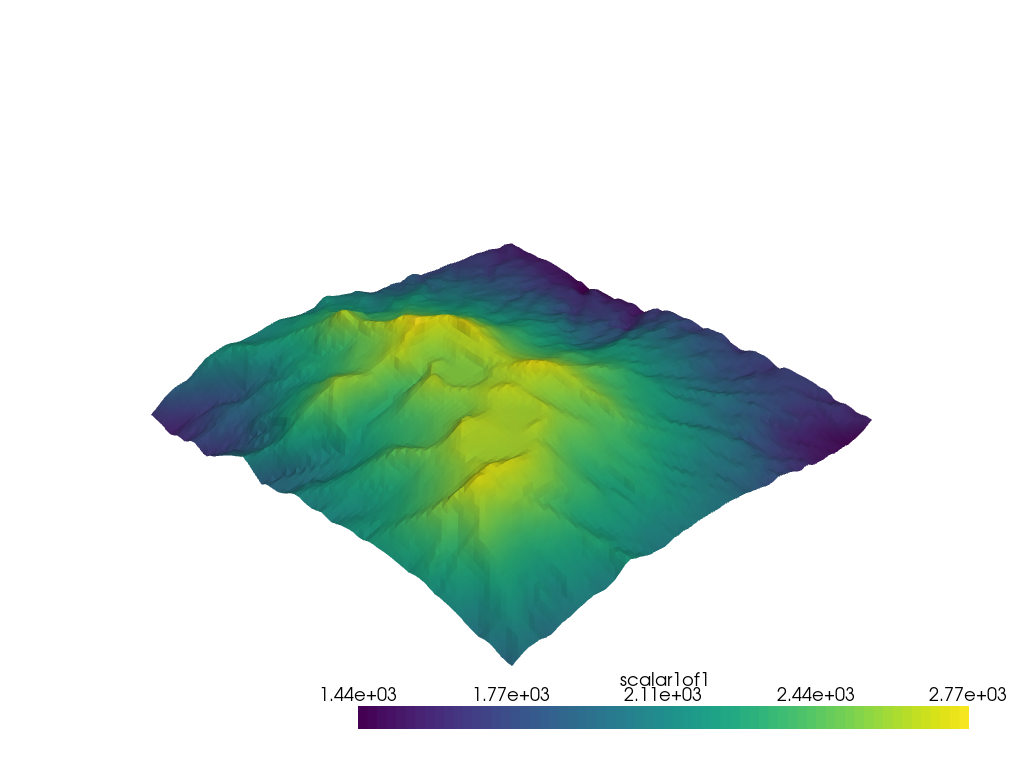

In [15]:
terrain.plot()

And now we have a 3D structured surface of the terrain! We can now extend
that structured surface into a 3D mesh to form a terrain following grid.
To do this, we first our cell spacings in the z-direction (these start
from the terrain surface). Then we repeat the XYZ structured coordinates
of the terrain mesh and decrease each Z level by our Z cell spacing.
Once we have those structured coordinates, we can create a
:class:`pyvista.StructuredGrid`.



In [13]:
z_cells = np.array([25]*5 + [35]*3 + [50]*2 + [75, 100])

xx = np.repeat(terrain.x, len(z_cells), axis=-1)
yy = np.repeat(terrain.y, len(z_cells), axis=-1)
zz = np.repeat(terrain.z, len(z_cells), axis=-1) - np.cumsum(z_cells).reshape((1, 1, -1))

print(terrain.x)

mesh = pv.StructuredGrid(xx, yy, zz)
mesh["Elevation"] = zz.ravel(order="F")
mesh

[[[1817500.]
  [1817500.]
  [1817500.]
  ...
  [1817500.]
  [1817500.]
  [1817500.]]

 [[1817575.]
  [1817575.]
  [1817575.]
  ...
  [1817575.]
  [1817575.]
  [1817575.]]

 [[1817650.]
  [1817650.]
  [1817650.]
  ...
  [1817650.]
  [1817650.]
  [1817650.]]

 ...

 [[1823350.]
  [1823350.]
  [1823350.]
  ...
  [1823350.]
  [1823350.]
  [1823350.]]

 [[1823425.]
  [1823425.]
  [1823425.]
  ...
  [1823425.]
  [1823425.]
  [1823425.]]

 [[1823500.]
  [1823500.]
  [1823500.]
  ...
  [1823500.]
  [1823500.]
  [1823500.]]]


StructuredGrid (0x7f33efef6700)
  N Cells:	70400
  N Points:	78732
  X Bounds:	1.818e+06, 1.824e+06
  Y Bounds:	5.646e+06, 5.652e+06
  Z Bounds:	9.364e+02, 2.744e+03
  Dimensions:	81, 81, 12
  N Arrays:	1

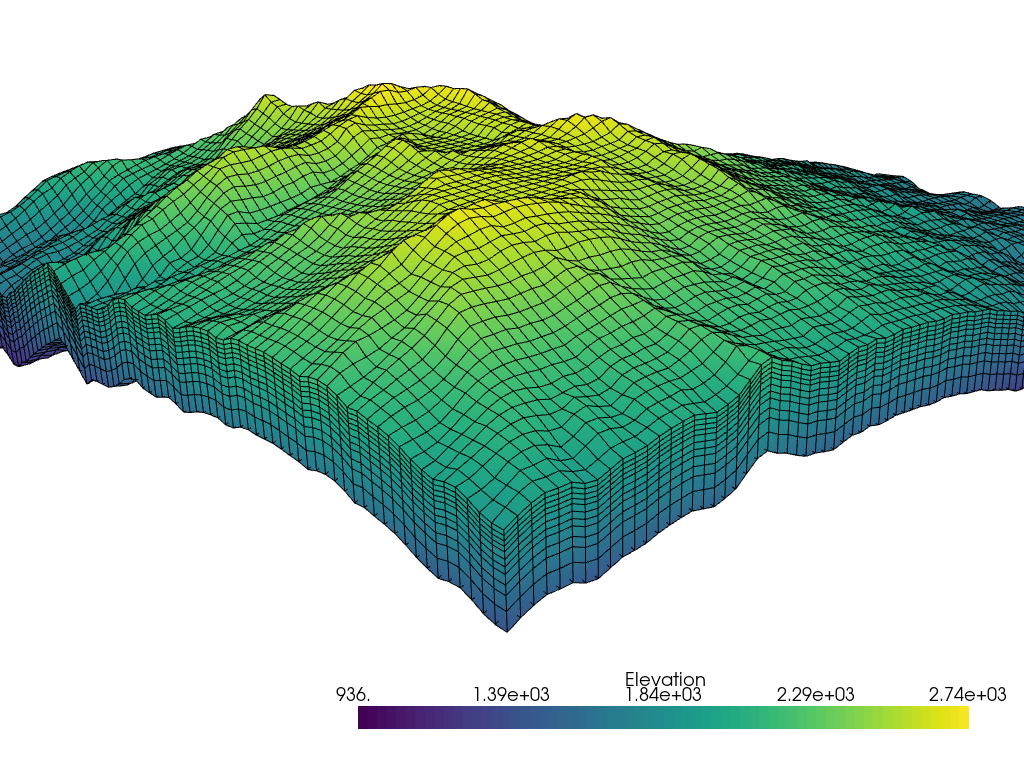

In [8]:
cpos = [(1826736.796308761, 5655837.275274233, 4676.8405505181745),
 (1821066.1790519988, 5649248.765538796, 943.0995128226014),
 (-0.2797856225380979, -0.27966946337594883, 0.9184252809434081)]

mesh.plot(show_edges=True, lighting=False, cpos=cpos)